<a href="https://colab.research.google.com/github/pkondacs/marketdata/blob/master/Asset_Portfolio_by_using_yfinance_tickers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install some necessary packages

In [2]:
# activates the matplotlib to be displayed inline
# %matplotlib inline
# %pip install pandas-datareader
# %pip install quandl
# %pip install python-dotenv
# %pip install yfinance

import yfinance as yf
import pandas as pd

tickers = ["AAPL","MSFT","NG=F","CL=F"]

# Fetch stock price data for Apple and Microsoft
dfs = []
for ticker in tickers:
    df = yf.download(ticker, start="2000-01-01")
    dfs.append(df)

# Concatenate Apple and Microsoft stock price dataframes
combined_df = pd.concat([df['Close'] for df in dfs], axis=1, keys=tickers)
combined_df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,MSFT,NG=F,CL=F
Date,,,,
2000-01-03,0.999442,58.28125,NaN,NaN
2000-01-04,0.915179,56.31250,NaN,NaN
2000-01-05,0.928571,56.90625,NaN,NaN
2000-01-06,0.848214,55.00000,NaN,NaN
2000-01-07,0.888393,55.71875,NaN,NaN


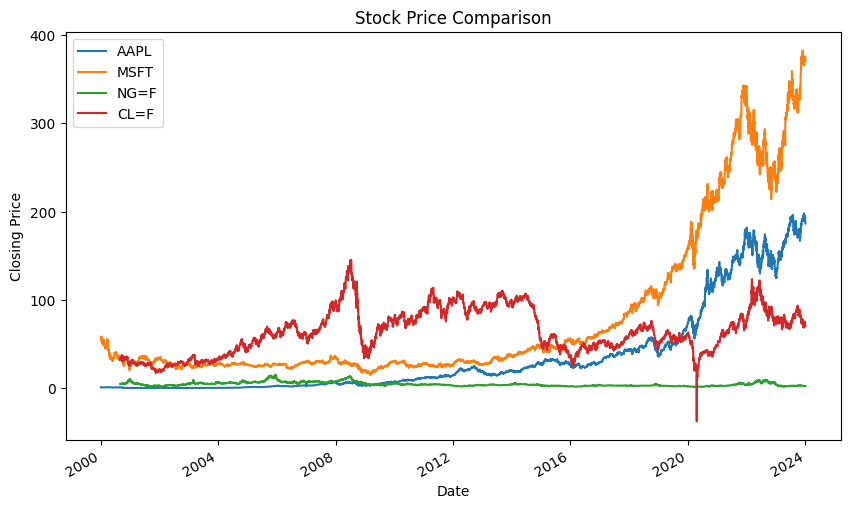

In [3]:
import matplotlib.pyplot as plt

# Plot the combined stock price data
combined_df.plot(figsize=(10, 6))

# Set the chart title and labels
plt.title('Stock Price Comparison')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Display the legend
plt.legend(tickers)

# Display the chart
plt.show()

In [4]:
print(combined_df.index)

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
               '2023-12-22', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2024-01-02'],
              dtype='datetime64[ns]', name='Date', length=6043, freq=None)


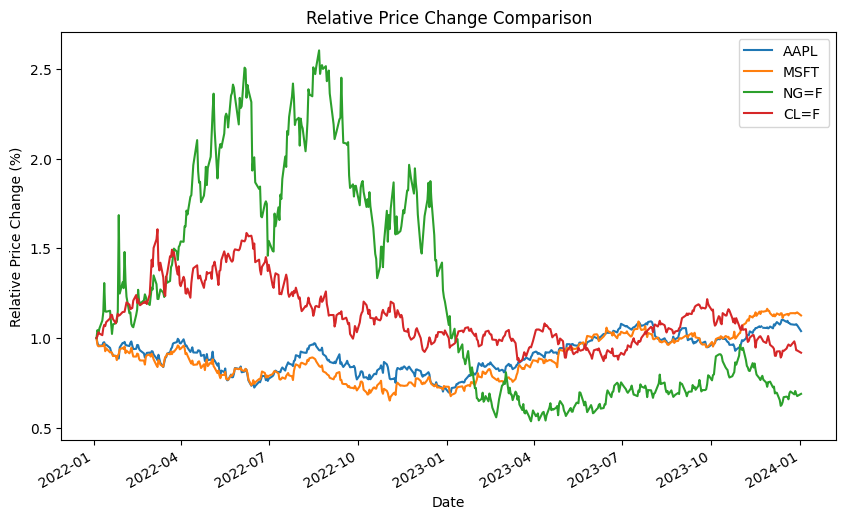

In [16]:
# Define the fixed date from which to calculate relative price change
fixed_date = '2022-01-04'

# Check if the fixed date is present in the index
if fixed_date not in combined_df.index:
    print(f"Fixed date {fixed_date} is not present in the data.")
else:
    # combined_df['Date'] = pd.to_datetime(combined_df['Date']) # Date is already datetime type
    # combined_df.set_index('Date', inplace=True) # Date is already an index in the imported yfinance dataframe

    # Ensure the fixed_date is a datetime object
    fixed_date = pd.to_datetime(fixed_date)
    # Get the prices on the fixed date
    fixed_date_prices = combined_df.loc[fixed_date]
    # Calculate the percentage change relative to the fixed date
    price_changes = combined_df.divide(fixed_date_prices)

    # Slice the DataFrame to only include rows from the fixed_date onwards
    price_changes_from_fixed = price_changes.loc[fixed_date:]

    # Plot the relative price change data
    price_changes_from_fixed.plot(figsize=(10, 6)) # You can adjust the figure size as needed
    # Set the chart title and labels
    plt.title('Relative Price Change Comparison')
    plt.xlabel('Date')
    plt.ylabel('Relative Price Change (%)')
    # Display the legend
    plt.legend(tickers)
    # Display the chart
plt.show()

<Axes: >

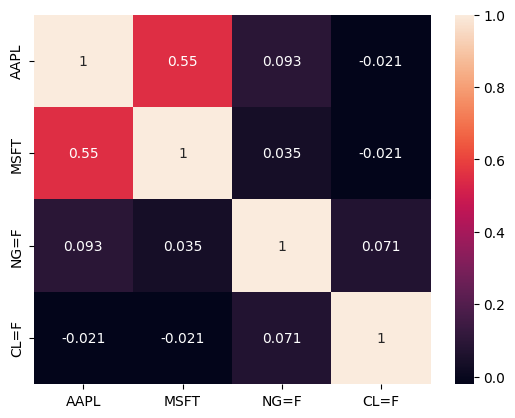

In [17]:
# Define the fixed date from which to calculate relative price change
fixed_date = '2023-01-04'

import numpy as np
import seaborn as sns

prf_returns = (combined_df.loc[fixed_date:].pct_change() + 1)[1:]
log_returns = np.log(prf_returns)
corr = log_returns.corr()
sns.heatmap(corr, annot=True)

# Volatility vs average return of assets n this code:

1.   The std() method calculates the standard deviation of the daily returns for each stock, which we are using as a proxy for volatility.
2.   The mean() method calculates the average of the daily returns for each stock.
2.   We then create a new DataFrame called stock_metrics that contains these two metrics.
1.   We use plt.scatter() to create a scatter plot with volatility on the x-axis and average return on the y-axis.
2.   The loop that follows plt.scatter() goes through each stock in stock_metrics and annotates the points on the plot with their respective stock names (labels).
1.   Finally, we set up the title, labels, grid, and display the plot with plt.show()

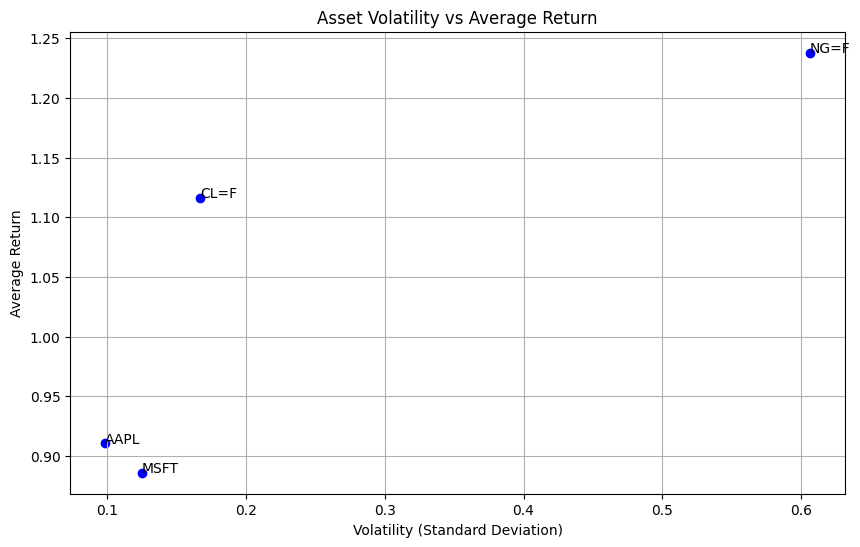

In [19]:
import matplotlib.pyplot as plt

# Calculate volatility (standard deviation) and average return for each stock
volatility = price_changes_from_fixed.std()
average_returns = price_changes_from_fixed.mean()

# Create a DataFrame with the calculated metrics
asset_metrics = pd.DataFrame({'Volatility': volatility, 'Average_Return': average_returns})

# Plotting the metrics
plt.figure(figsize=(10, 6))
plt.scatter(asset_metrics['Volatility'], asset_metrics['Average_Return'], color='blue')

# Annotate each point with the stock name
for i in asset_metrics.index:
    plt.annotate(i, (asset_metrics.loc[i, 'Volatility'], asset_metrics.loc[i, 'Average_Return']))

# Set the title and labels of the plot
plt.title('Asset Volatility vs Average Return')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Average Return')

# Show the plot
plt.grid(True)
plt.show()